In [1]:
#Importin the image file
raster_filename = 'heliponto_2.tif'
!wget https://github.com/tkorting/remote-sensing-images/raw/master/{raster_filename} 

--2021-09-30 20:15:56--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [redirecionando]
--2021-09-30 20:15:56--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 122951 (120K) [image/tiff]
Salvando em: “heliponto_2.tif.4”

heliponto_2.tif.4   100%[===================>] 120,07K  --.-KB/s    em 0,09s   

2021-09-30 20:15:57 (1,30 MB/s) - “hel

In [2]:
#Import cv2 libary 
import cv2

opencv_matrix = cv2.imread(raster_filename, cv2.IMREAD_GRAYSCALE)

print(opencv_matrix.shape)
print(type(opencv_matrix))

(334, 359)
<class 'numpy.ndarray'>


In [3]:
# type(opencv_matrix)

In [7]:
try:
  import rasteirio as rio   
except:
  #rasteio is not installed by 
  #!pip install rasterio
  import rasterio as rio 

with rio.open(raster_filename) as rio_raster:
  rio_matrix = rio_raster.read(1)

  print(type(rio_raster))
  print(rio_matrix.shape)
  print(type(rio_matrix))

<class 'rasterio.io.DatasetReader'>
(334, 359)
<class 'numpy.ndarray'>


In [8]:
from osgeo import gdal

gdal_raster = gdal.Open(raster_filename, gdal.GA_ReadOnly)
gdal_band = gdal_raster.GetRasterBand(1)
gdal_matrix = gdal_band.ReadAsArray()

print(type(gdal_raster))
print(gdal_matrix.shape)
print(type(gdal_matrix)) 

<class 'osgeo.gdal.Dataset'>
(334, 359)
<class 'numpy.ndarray'>


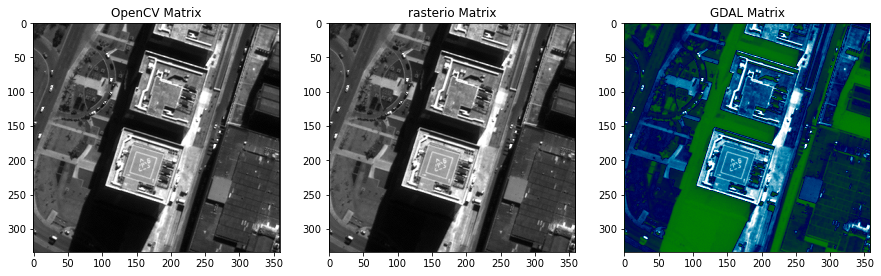

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 35))

plt.subplot(131)
plt.imshow(opencv_matrix, cmap = 'gray')
plt.title('OpenCV Matrix')

plt.subplot(132)
plt.imshow(rio_matrix, cmap = 'gray')
plt.title('rasterio Matrix')

plt.subplot(133)
plt.imshow(gdal_matrix, cmap = 'ocean')
plt.title('GDAL Matrix')

plt.show() 

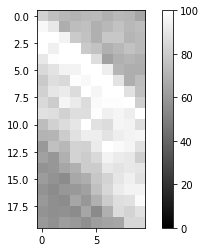

[[ 82  75  72  70  72  73  69  72  71  65]
 [ 97  91  68  74  75  69  72  76  72  74]
 [102 106  95  79  76  69  78  78  71  73]
 [104  94 104 101  79  76  69  72  76  73]
 [ 91  99 100 103 100  87  63  69  71  69]
 [ 85  89  95  95 100 108  93  71  68  68]
 [ 79  87  85  99  97 101 117  89  68  74]
 [ 82  90  92  86 102  96 100 111  88  75]
 [ 85  80  96  92  86  98  99  99 104  81]
 [ 88  87  82  87  87  99  94  96  93 112]
 [ 74  82  86  90 105  88  86  96  95  87]
 [ 70  71  80  88  93  93  89  93  95  96]
 [ 60  75  72  83  82  92 101  98  96  88]
 [ 63  59  69  83  80  85  95  92  91  81]
 [ 58  59  65  69  80  80  91  89  91  90]
 [ 61  58  55  66  68  78  83  90  94  88]
 [ 58  55  59  60  63  75  84  92  95  95]
 [ 60  56  55  65  59  69  80  87  88  98]
 [ 58  56  57  55  65  54  69  86  83  88]
 [ 60  57  62  60  56  62  64  65  84  84]]


In [10]:
block_matrix = rio_matrix[20:40, 15:25]

plt.figure()
plt.imshow(block_matrix, cmap = 'gray',vmin=0, vmax=100)
plt.colorbar()
plt.show()

print(block_matrix)

In [11]:
10>block_matrix.any()

True

## Filtragem Espacial

https://www.youtube.com/watch?v=hRtmSh2gF48

# Exercice 1

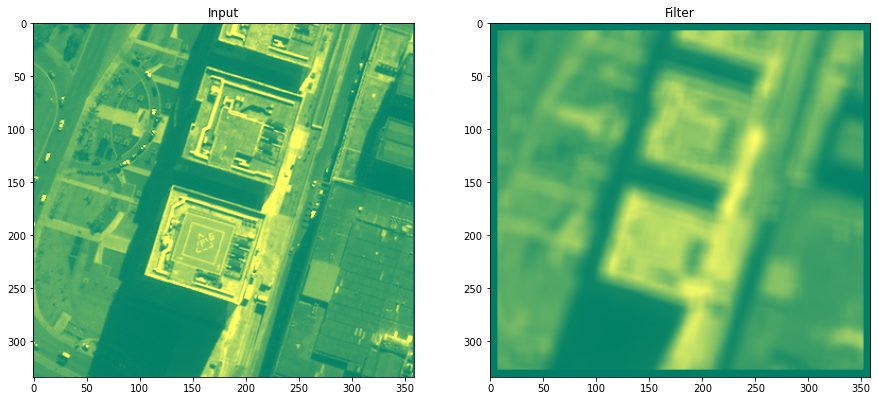

In [130]:
import numpy as np

#Inicial Parametes 
width = 15
height = 15
weigth = 1/(15*15)


# Creating a medeal point
width_mean  = int( width/2)
height_mean = int(height/2) 


leng = width*height #lenth of width vector
new_matrix = rio_matrix.copy()
rows   = new_matrix.shape[0] #lent os rows
coluns = new_matrix.shape[1] #lent of colluns

#Creating a vector of ones
avarege_kernel = np.ones((rows,coluns)) #creatind a matrix with 1 ones
avarege_kernel = avarege_kernel.flatten()

# Alococate a vector with the weith
weigth_vector =[]
for i in range(leng): weigth_vector.append(avarege_kernel[i]*weigth)
    
conv_matrix=[]

conv_matrix= np.zeros_like(new_matrix)

for i in range(height_mean,rows-height_mean):
    for j in range(width_mean,coluns-width_mean):
        box_matrix = new_matrix[i-height_mean : i + height_mean +1 , 
                                j-width_mean  : j + width_mean  +1]
        conv_matrix[i,j] = np.dot(box_matrix.flatten(),weigth_vector)
        
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = 'summer')#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= 'summer')
plt.title('Filter')

plt.show()


In [16]:
def lower_width(x):
    if x < width_mean: return x
    else: return width_mean
def upper_width(x):
    if x < row-width_mean: return width-width_mean 
    else: return row-x
    
def lower_height(x):
    if x < height_mean: return x
    else: return height_mean
def upper_height(x):
    if x < column-height_mean: return height-height_mean 
    else: return column-x

# Exercice 1 : Bonus

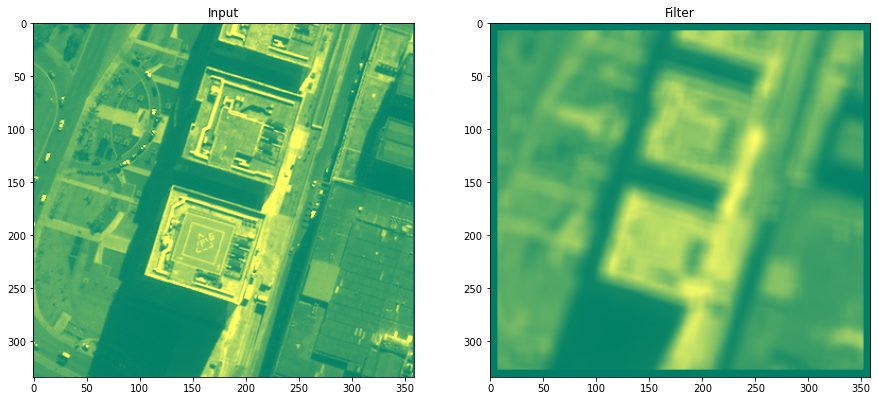

In [131]:
import numpy as np

#Inicial Parametes 
width = 15
height = 15
weigth = 1/(15*15)


# Creating a medeal point
width_mean  = int( width/2)
height_mean = int(height/2) 


leng = width*height #lenth of width vector
new_matrix = rio_matrix.copy()
rows   = new_matrix.shape[0] #lent os rows
coluns = new_matrix.shape[1] #lent of colluns

#Creating a vector of ones
avarege_kernel = np.ones((rows,coluns)) #creatind a matrix with 1 ones
avarege_kernel = avarege_kernel.flatten()

# Alococate a vector with the weith
weigth_vector =[]
for i in range(leng): weigth_vector.append(avarege_kernel[i]*weigth)
    
conv_matrix=[]

conv_matrix= np.zeros_like(new_matrix)

for i in range(height_mean,rows-height_mean):
    for j in range(width_mean,coluns-width_mean):
        box_matrix = new_matrix[i-height_mean : i + height_mean +1 , 
                                j-width_mean  : j + width_mean  +1]
        conv_matrix[i,j] = np.dot(box_matrix.flatten(),weigth_vector)
        
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = 'summer')#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= 'summer')
plt.title('Filter')

plt.show()


def lower_width(x):
    if x < width_mean: return x
    else: return width_mean
def upper_width(x):
    if x < row-width_mean: return width-width_mean 
    else: return row-x
    
def lower_height(x):
    if x < height_mean: return x
    else: return height_mean
def upper_height(x):
    if x < column-height_mean: return height-height_mean 
    else: return column-x